In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#pandas settings
settings= {'display.max_rows': 50,
           'display.max_columns': 200,
           'display.width': 1000}

for k, v in settings.items():
    pd.set_option(k,v)
    
#matplotlib settings
plt.style.use('ggplot')


In [3]:
#Load raw data to pandas
path= "../../Data/Raw_Data/"

raw_energy= pd.read_csv(path + "energy_dataset.csv")
raw_weather= pd.read_csv(path + "weather_features.csv")

In [4]:
#preview energy data
print("Energy shape: ", raw_energy.shape)
raw_energy.head()

Energy shape:  (35064, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
#preview weather data
print("Weather shape: ", raw_weather.shape)
raw_weather.head()

Weather shape:  (178396, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Data Cleaning

In [6]:
#Import modules
path= "../../"
os.chdir(path)

In [7]:
from src.DataCleaning import clean_columns, set_time_index, kelvin_to_fahrenheit, input_mean

#Remove Forecast cols(other than TSO Predictions)
forecast_cols= []
for col in raw_energy.columns:
    if "forecast" in col:
        forecast_cols.append(col)
        
#Clean raw_energy
clean_energy= set_time_index(input_mean(clean_columns(raw_energy, cols= forecast_cols)), time_column= "time")

#Clean raw_weather
clean_weather= set_time_index(clean_columns(raw_weather, cols= None), time_column= "dt_iso")

weather_cols= ["temp", "temp_min", "temp_max"]
clean_weather= kelvin_to_fahrenheit(clean_weather, weather_cols)

/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/Python Sandbox/EnergyPricePredictor/src/DataCleaning.py:74: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe= dataframe.fillna(dataframe.mean())


In [8]:
#Sanity checks
print("Old energy: %s  New energy: %s" % (raw_energy.shape, clean_energy.shape))
print("Old weather: %s  New weather: %s" % (raw_weather.shape, clean_weather.shape))

Old energy: (35064, 29)  New energy: (35064, 17)
Old weather: (178396, 17)  New weather: (178396, 16)


Stats about energy data

In [9]:
#Variable types
clean_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other                     

In [10]:
#Descriptive stats
clean_energy.describe().T


,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.513540,85.330814,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.059208,354.477568,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35064.0,5622.737488,2201.265238,0.00,4127.0000,4971.00,6428.00,20034.00
generation fossil hard coal,35064.0,4256.065742,1961.097443,0.00,2528.7500,4473.00,5837.00,8359.00
generation fossil oil,35064.0,298.319789,52.506441,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35064.0,475.577343,792.191889,0.00,0.0000,68.00,615.00,4523.00
generation hydro run-of-river and poundage,35064.0,972.116108,400.668934,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35064.0,2605.114735,1834.728624,0.00,1078.0000,2165.00,3756.25,9728.00
generation nuclear,35064.0,6263.907039,839.464380,0.00,5761.0000,6563.50,7024.00,7117.00
generation other,35064.0,60.228585,20.233185,0.00,53.0000,57.00,80.00,106.00


# EDA

How accurate were TSO Predictions?

In [14]:
tso_preds= clean_energy.loc[:,"price day ahead"].values
y= clean_energy.loc[:,"price actual"].values

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#MSE, RMSE, MAE, MAPE
mse= mean_squared_error(y, tso_preds)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y, tso_preds)
mape= mean_absolute_percentage_error(y, tso_preds)

metrics= [mse, rmse, mae, mape]

for metric in metrics:
    print(str(metric),"-----------------")

175.55870664499204 -----------------
13.249856853754762 -----------------
10.485264658909424 -----------------
0.2000130392538274 -----------------


In [23]:
f, ax= plt.subplots(nrows=3, n_cols= 1, figsize= (15, 10))

for

SyntaxError: invalid syntax (2189260185.py, line 3)

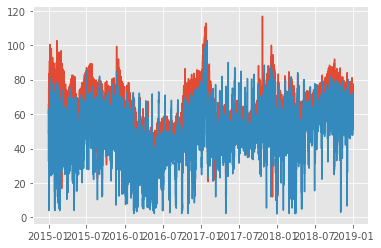

In [21]:
plt.plot(clean_energy.index, y)
plt.plot(clean_energy.index, tso_preds)

In [ ]:
#Is there correlation between target and weather?